In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

import transcripty as tpy

%matplotlib inline

# How risky is college investment?

This project is meant to highlight the importance of packaging your code nicely so that
others can build upon your work.

In my own research, I benefited that the authors of this paper, Lutz Hendricks and Oksana
Leukhina, provided their code and data in a relatively usable format. We hope that after
the next few days of instruction, you will be prepared to do an even better job at
packaging your research in an easily replicable and repeatable format.

We have written two versions of a Python package that contains the code needed to
replicate elements Section 2 in their paper. You will be asked to explore some of the
implications of their model using this code.


## Simple model of college credit accumulation

In this paper, the authors are interested in "quantifying the the relative importance of heterogeneity and uncertainty for college dropout decisions." One of their innovations beyond what previous work has done is they have a more explicit model of college enrollment, credit accumulation, and dropout decisions.

Prior to presenting their full model, the authors use a simple model that only deals with credit accumulation to motivate some of the modeling decisions they make in later sections of the paper. We will focus only on this simple model.

### Individual's problem

We describe a single individual's problem.

The individual begins as a college freshman.

They begin their college career at $t=1$ with 0 college credits, $n_0 = 0$

* The student draws an ability level, $a \sim N(0, 1)$
* And a noisy signal of that ability given by $\text{GPA} = a + \varepsilon$ where $\varepsilon \sim N(0, \sigma_\varepsilon^2)$.

Each year a student attempts to complete $n_{\text{courses}} = 12$ that are each worth $n_{\text{credits}} = 3$.

The probability that a student successfully passes any given course is given by

$$p(a_i) = \gamma_{\text{min}} + \frac{1 - \gamma_{\text{min}}}{1 + \gamma_1 \exp^{-\gamma_2 a_i}}$$

A student is awarded a degree once they have accumulated 125 credits (completed 42 courses).

If a student fails to collect a degree after 6 years, they drop out of college.

### Data

The authors use data from a proprietary microdata from the High School and Beyond survey
administered by the National Center for Education Statistics (NCES) which includes
information on a student's HS GPA, college transcript information, and financial
resources to calibrate their model.



## Exploration Exercise

The code that replicates the outcomes from Hendricks Leukhina can be found on Github at https://www.github.com/cc7768/transcripty.

If you were assigned to an odd numbered group, then you should work off of the `group_odd` branch and if you were assigned to an even numbered group, then you should off of the `group_even` branch.


Once you've downloaded the repository and switched to the appropriate branch, you can install the package by entering its folder in a terminal and running `python setup.py install`. You should then be able to work from this notebook and just import the package contents like a normal package i.e., `import transcripty as tpy` (as done at top of the notebook).


### Exercise 1

Using the parameters that follow, simulate the college experience for 25,000 separate individuals. Plot the 10/20/.../90 percentile total credits earned after two years from the simulation against the 10/20/.../90 percentile total credits earned after two years in the data (included in code cell below).

<BarContainer object of 9 artists>

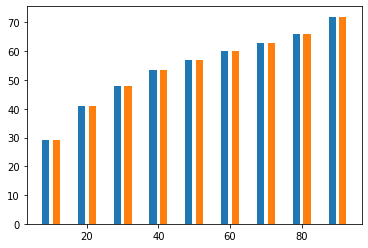

In [7]:
# Parameters to use in simulation
gamma_min = 0.35
gamma_1 = 0.6778
gamma_2 = 1.0556
sigma = 0.25



# Deciles from the data
y2_totalcredit_deciles = np.array([
    29.0, 41.0, 48.0, 53.37, 57.0, 60.0, 62.97, 66.0, 72.0
])




# Code to help you plot
fig, ax = plt.subplots()

x = np.linspace(10, 90, 9)

ax.bar(x-1.5, y2_totalcredit_deciles, width=2.)
ax.bar(x+1.50, y2_totalcredit_deciles, width=2.)

### Exercise 2

Consider the following alternative model to the one proposed in Hendricks Leukhina. The probability of passing a course is given by $p(a_i) = \bar{p}$ -- We will call this the common probability model.

Find the $\bar{p}$ that best fits the moments. Now repeat the plot from the cell above with the "best" common probability model.

<BarContainer object of 9 artists>

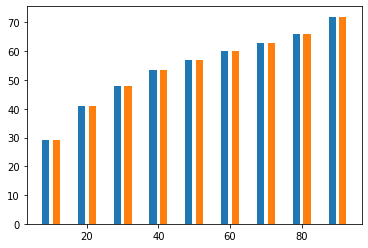

In [6]:
# Deciles from the data
y2_totalcredit_deciles = np.array([
    29.0, 41.0, 48.0, 53.37, 57.0, 60.0, 62.97, 66.0, 72.0
])

# Code to help you plot
fig, ax = plt.subplots()

x = np.linspace(10, 90, 9)

ax.bar(x-1.5, y2_totalcredit_deciles, width=2.)
ax.bar(x+1.50, y2_totalcredit_deciles, width=2.)

### Exercise 3

**Challenging**: Now imagine a researcher discovers a magic pill that improves the probability that an individual passes a class by 5\%. You as the government only have enough of the pills to give them to one of the GPA quartiles (you can't directly observe ability levels). If you'd like to maximize the overall graduation rate, which GPA quartile do you give the pills to?

*Hint*: I would create a new subclass of `CreditAccumulationModel`